## Visualizing FordGo Bike Data
### Comparison of first 3 months January, February and March of the year 2019 and year 2020.
First 3 months of the year i.e. January, February and March are considered to be the winter months and hence I have made exploratory analysis for these months of the year 2019 and year 2020. The dataset used consists of the monthly trip data of the respective months in the CSV format.

In [103]:
# import all packages 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import os
import glob

%matplotlib inline

### Preliminary Data Wrangling

In [104]:
#loading dataset for first 3 months of 2020
df_2020_1= pd.read_csv("/Users/Shivani/Desktop/Bike Data 2020/202001-baywheels-tripdata.csv")
df_2020_2= pd.read_csv("/Users/Shivani/Desktop/Bike Data 2020/202002-baywheels-tripdata.csv")
df_2020_3= pd.read_csv("/Users/Shivani/Desktop/Bike Data 2020/202003-baywheels-tripdata.csv")

/Users/vrajpatel/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (13) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [105]:
df_2020 = pd.concat([df_2020_1, df_2020_2, df_2020_3])

In [106]:
#loading dataset for first 3 months of 2019
df_2019_1= pd.read_csv("/Users/Shivani/Desktop/Bike Data 2020/201901-fordgobike-tripdata.csv")
df_2019_2= pd.read_csv("/Users/Shivani/Desktop/Bike Data 2020/201902-fordgobike-tripdata.csv")
df_2019_3= pd.read_csv("/Users/Shivani/Desktop/Bike Data 2020/201903-fordgobike-tripdata.csv")

In [107]:
df_2019 = pd.concat([df_2019_1, df_2019_2, df_2019_3])

In [108]:
df_2020.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,rental_access_method
0,83118,2020-01-31 15:23:47.7330,2020-02-01 14:29:06.2630,400.0,Buchanan St at North Point St,37.804272,-122.433537,400.0,Buchanan St at North Point St,37.804272,-122.433537,13052,Customer,NaN
1,68239,2020-01-31 15:40:31.6160,2020-02-01 10:37:51.0000,99.0,Folsom St at 15th St,37.767037,-122.415443,99.0,Folsom St at 15th St,37.767037,-122.415443,12235,Subscriber,NaN
2,55407,2020-01-31 17:48:16.6350,2020-02-01 09:11:44.3170,197.0,El Embarcadero at Grand Ave,37.808848,-122.249680,197.0,El Embarcadero at Grand Ave,37.808848,-122.249680,12822,Customer,NaN
3,54929,2020-01-31 17:53:03.4130,2020-02-01 09:08:32.6340,197.0,El Embarcadero at Grand Ave,37.808848,-122.249680,197.0,El Embarcadero at Grand Ave,37.808848,-122.249680,11705,Customer,NaN
4,55700,2020-01-31 17:12:33.4600,2020-02-01 08:40:53.6460,12.0,Pier 1/2 at The Embarcadero,37.796389,-122.394586,371.0,Lombard St at Columbus Ave,37.802746,-122.413579,3673,Customer,NaN


In [109]:
df_2020.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 905007 entries, 0 to 176798
Data columns (total 14 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             905007 non-null  int64  
 1   start_time               905007 non-null  object 
 2   end_time                 905007 non-null  object 
 3   start_station_id         418705 non-null  float64
 4   start_station_name       419938 non-null  object 
 5   start_station_latitude   905007 non-null  float64
 6   start_station_longitude  905007 non-null  float64
 7   end_station_id           419225 non-null  float64
 8   end_station_name         420499 non-null  object 
 9   end_station_latitude     905007 non-null  float64
 10  end_station_longitude    905007 non-null  float64
 11  bike_id                  905007 non-null  int64  
 12  user_type                905007 non-null  object 
 13  rental_access_method     617858 non-null  object 
dtypes: f

In [110]:
df_2019.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,bike_share_for_all_trip
0,80825,2019-01-31 17:57:44.6130,2019-02-01 16:24:49.8640,229.0,Foothill Blvd at 42nd Ave,37.775745,-122.213037,196.0,Grand Ave at Perkins St,37.808894,-122.256460,4861,Subscriber,No
1,65900,2019-01-31 20:58:33.8860,2019-02-01 15:16:54.1730,4.0,Cyril Magnin St at Ellis St,37.785881,-122.408915,134.0,Valencia St at 24th St,37.752428,-122.420628,5506,Subscriber,No
2,62633,2019-01-31 18:06:52.9240,2019-02-01 11:30:46.5300,245.0,Downtown Berkeley BART,37.870139,-122.268422,157.0,65th St at Hollis St,37.846784,-122.291376,2717,Customer,No
3,44680,2019-01-31 19:46:09.7190,2019-02-01 08:10:50.3180,85.0,Church St at Duboce Ave,37.770083,-122.429156,53.0,Grove St at Divisadero,37.775946,-122.437777,4557,Customer,No
4,60709,2019-01-31 14:19:01.5410,2019-02-01 07:10:51.0650,16.0,Steuart St at Market St,37.794130,-122.394430,28.0,The Embarcadero at Bryant St,37.787168,-122.388098,2100,Customer,No


In [111]:
df_2019.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 631793 entries, 0 to 256298
Data columns (total 14 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             631793 non-null  int64  
 1   start_time               631793 non-null  object 
 2   end_time                 631793 non-null  object 
 3   start_station_id         631127 non-null  float64
 4   start_station_name       631127 non-null  object 
 5   start_station_latitude   631793 non-null  float64
 6   start_station_longitude  631793 non-null  float64
 7   end_station_id           631127 non-null  float64
 8   end_station_name         631127 non-null  object 
 9   end_station_latitude     631793 non-null  float64
 10  end_station_longitude    631793 non-null  float64
 11  bike_id                  631793 non-null  int64  
 12  user_type                631793 non-null  object 
 13  bike_share_for_all_trip  631793 non-null  object 
dtypes: f

To make both the dataset 2019 and 2020 same, some extra columns are to be deleted i.e rental_access_method from 2020 dataset and bike_share_for_all_trip for 2019 dataset.

In [112]:
del df_2020['rental_access_method']

In [113]:
#test if delete was successful
df_2020.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 905007 entries, 0 to 176798
Data columns (total 13 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             905007 non-null  int64  
 1   start_time               905007 non-null  object 
 2   end_time                 905007 non-null  object 
 3   start_station_id         418705 non-null  float64
 4   start_station_name       419938 non-null  object 
 5   start_station_latitude   905007 non-null  float64
 6   start_station_longitude  905007 non-null  float64
 7   end_station_id           419225 non-null  float64
 8   end_station_name         420499 non-null  object 
 9   end_station_latitude     905007 non-null  float64
 10  end_station_longitude    905007 non-null  float64
 11  bike_id                  905007 non-null  int64  
 12  user_type                905007 non-null  object 
dtypes: float64(6), int64(2), object(5)
memory usage: 96.7+ MB


In [114]:
del df_2019['bike_share_for_all_trip']

In [115]:
#test if delete was successful
df_2019.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 631793 entries, 0 to 256298
Data columns (total 13 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             631793 non-null  int64  
 1   start_time               631793 non-null  object 
 2   end_time                 631793 non-null  object 
 3   start_station_id         631127 non-null  float64
 4   start_station_name       631127 non-null  object 
 5   start_station_latitude   631793 non-null  float64
 6   start_station_longitude  631793 non-null  float64
 7   end_station_id           631127 non-null  float64
 8   end_station_name         631127 non-null  object 
 9   end_station_latitude     631793 non-null  float64
 10  end_station_longitude    631793 non-null  float64
 11  bike_id                  631793 non-null  int64  
 12  user_type                631793 non-null  object 
dtypes: float64(6), int64(2), object(5)
memory usage: 67.5+ MB


Now, after deletion of the columns both are dataset 2019 and 2020 are having identical column names. 

In [116]:
df_bikedata = pd.concat([df_2019 , df_2020])

In [117]:
df_bikedata.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1536800 entries, 0 to 176798
Data columns (total 13 columns):
 #   Column                   Non-Null Count    Dtype  
---  ------                   --------------    -----  
 0   duration_sec             1536800 non-null  int64  
 1   start_time               1536800 non-null  object 
 2   end_time                 1536800 non-null  object 
 3   start_station_id         1049832 non-null  float64
 4   start_station_name       1051065 non-null  object 
 5   start_station_latitude   1536800 non-null  float64
 6   start_station_longitude  1536800 non-null  float64
 7   end_station_id           1050352 non-null  float64
 8   end_station_name         1051626 non-null  object 
 9   end_station_latitude     1536800 non-null  float64
 10  end_station_longitude    1536800 non-null  float64
 11  bike_id                  1536800 non-null  int64  
 12  user_type                1536800 non-null  object 
dtypes: float64(6), int64(2), object(5)
memory u

In [118]:
df_bikedata.shape

(1536800, 13)

In [119]:
#checking for null values
df_bikedata.isnull().sum()

duration_sec                    0
start_time                      0
end_time                        0
start_station_id           486968
start_station_name         485735
start_station_latitude          0
start_station_longitude         0
end_station_id             486448
end_station_name           485174
end_station_latitude            0
end_station_longitude           0
bike_id                         0
user_type                       0
dtype: int64

In [120]:
##checking for duplicate values
df_bikedata.duplicated().sum()

7512

In [121]:
df_bikedata.user_type.value_counts()

Subscriber    1096295
Customer       440505
Name: user_type, dtype: int64

In [122]:
df_bikedata.sample(10)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type
220054,195,2020-02-12 09:26:26,2020-02-12 09:29:42,NaN,NaN,37.769068,-122.413398,NaN,NaN,37.767112,-122.406899,924495,Subscriber
27511,512,2020-01-24 10:55:01.1000,2020-01-24 11:03:33.4830,384.0,Jackson St at Polk St,37.794160,-122.421568,424.0,Greenwich St at Webster St,37.799208,-122.434122,10297,Customer
278131,511,2020-02-24 21:58:24,2020-02-24 22:06:56,NaN,NaN,37.776724,-122.438190,NaN,NaN,37.779752,-122.431877,430090,Subscriber
151591,213,2020-01-18 10:14:07,2020-01-18 10:17:41,NaN,NaN,37.761781,-122.420023,NaN,NaN,37.755461,-122.419391,445360,Subscriber
199037,398,2019-03-08 18:34:31.6900,2019-03-08 18:41:10.4360,256.0,Hearst Ave at Euclid Ave,37.875112,-122.260553,252.0,Channing Way at Shattuck Ave,37.865847,-122.267443,6000,Subscriber
177876,299,2020-02-01 17:44:04,2020-02-01 17:49:03,NaN,NaN,37.760998,-122.434171,NaN,NaN,37.760760,-122.426263,455043,Subscriber
46157,181,2020-02-19 16:37:45.2210,2020-02-19 16:40:47.0290,176.0,MacArthur BART Station,37.828410,-122.266315,192.0,37th St at West St,37.826696,-122.271797,12894,Customer
132590,353,2019-02-08 23:58:53.9600,2019-02-09 00:04:47.9050,176.0,MacArthur BART Station,37.828410,-122.266315,189.0,Genoa St at 55th St,37.839649,-122.271756,5042,Customer
155940,218,2019-01-08 18:09:35.5080,2019-01-08 18:13:13.5740,250.0,North Berkeley BART Station,37.873558,-122.283093,251.0,California St at University Ave,37.870555,-122.279720,1132,Subscriber
183605,471,2020-03-01 18:45:04,2020-03-01 18:52:56,NaN,NaN,37.762193,-122.414451,NaN,NaN,37.767576,-122.430561,148914,Subscriber


### Cleaning Data

In [123]:
## make a copy of the dataframe
df_bike_clean = df_bikedata.copy()

In [124]:
df_bike_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1536800 entries, 0 to 176798
Data columns (total 13 columns):
 #   Column                   Non-Null Count    Dtype  
---  ------                   --------------    -----  
 0   duration_sec             1536800 non-null  int64  
 1   start_time               1536800 non-null  object 
 2   end_time                 1536800 non-null  object 
 3   start_station_id         1049832 non-null  float64
 4   start_station_name       1051065 non-null  object 
 5   start_station_latitude   1536800 non-null  float64
 6   start_station_longitude  1536800 non-null  float64
 7   end_station_id           1050352 non-null  float64
 8   end_station_name         1051626 non-null  object 
 9   end_station_latitude     1536800 non-null  float64
 10  end_station_longitude    1536800 non-null  float64
 11  bike_id                  1536800 non-null  int64  
 12  user_type                1536800 non-null  object 
dtypes: float64(6), int64(2), object(5)
memory u

In [125]:
# replace the value 'None' with the NaN (missing value)
df_bike_clean = df_bike_clean.replace('None', np.nan)

In [126]:
#dropping duplicates
df_bike_clean=df_bike_clean.drop_duplicates(keep=False)
df_bike_clean

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type
0,80825,2019-01-31 17:57:44.6130,2019-02-01 16:24:49.8640,229.0,Foothill Blvd at 42nd Ave,37.775745,-122.213037,196.0,Grand Ave at Perkins St,37.808894,-122.256460,4861,Subscriber
1,65900,2019-01-31 20:58:33.8860,2019-02-01 15:16:54.1730,4.0,Cyril Magnin St at Ellis St,37.785881,-122.408915,134.0,Valencia St at 24th St,37.752428,-122.420628,5506,Subscriber
2,62633,2019-01-31 18:06:52.9240,2019-02-01 11:30:46.5300,245.0,Downtown Berkeley BART,37.870139,-122.268422,157.0,65th St at Hollis St,37.846784,-122.291376,2717,Customer
3,44680,2019-01-31 19:46:09.7190,2019-02-01 08:10:50.3180,85.0,Church St at Duboce Ave,37.770083,-122.429156,53.0,Grove St at Divisadero,37.775946,-122.437777,4557,Customer
4,60709,2019-01-31 14:19:01.5410,2019-02-01 07:10:51.0650,16.0,Steuart St at Market St,37.794130,-122.394430,28.0,The Embarcadero at Bryant St,37.787168,-122.388098,2100,Customer
...,...,...,...,...,...,...,...,...,...,...,...,...,...
176794,61,2020-04-01 10:42:35,2020-04-01 10:43:37,NaN,NaN,37.848493,-122.265797,NaN,NaN,37.848476,-122.265779,999960,Subscriber
176795,78,2020-03-18 17:10:42,2020-03-18 17:12:01,NaN,NaN,37.848499,-122.265794,NaN,NaN,37.848477,-122.265815,999960,Subscriber
176796,122,2020-04-01 13:32:28,2020-04-01 13:34:31,NaN,NaN,37.848507,-122.266010,NaN,NaN,37.848485,-122.266063,633095,Subscriber
176797,340,2020-04-01 13:07:34,2020-04-01 13:13:14,NaN,NaN,37.848530,-122.266013,NaN,NaN,37.848497,-122.266029,633095,Subscriber


In [127]:
#test if drop was successful
df_bike_clean.duplicated().sum()

0

In [128]:
# Changing the datatypes of start_station_id, end_station_id and bike_id

df_bike_clean.start_station_id = df_bike_clean.start_station_id.astype(str)
df_bike_clean.end_station_id = df_bike_clean.end_station_id.astype(str)
df_bike_clean.bike_id = df_bike_clean.bike_id.astype(str)

In [129]:
# Changing the datatypes of user_type
df_bike_clean.user_type = df_bike_clean.user_type.astype('category')

In [130]:
# Changing the datatypes of start_time and end_time to datetime format
df_bike_clean.start_time = pd.to_datetime(df_bike_clean.start_time)
df_bike_clean.end_time = pd.to_datetime(df_bike_clean.end_time)

In [131]:
#test if the changing of datatypes was successful
df_bike_clean.info(null_counts = True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1521776 entries, 0 to 176798
Data columns (total 13 columns):
 #   Column                   Non-Null Count    Dtype         
---  ------                   --------------    -----         
 0   duration_sec             1521776 non-null  int64         
 1   start_time               1521776 non-null  datetime64[ns]
 2   end_time                 1521776 non-null  datetime64[ns]
 3   start_station_id         1521776 non-null  object        
 4   start_station_name       1048773 non-null  object        
 5   start_station_latitude   1521776 non-null  float64       
 6   start_station_longitude  1521776 non-null  float64       
 7   end_station_id           1521776 non-null  object        
 8   end_station_name         1049320 non-null  object        
 9   end_station_latitude     1521776 non-null  float64       
 10  end_station_longitude    1521776 non-null  float64       
 11  bike_id                  1521776 non-null  object        
 12  u

#### Addition of the new columns for analysis

In [132]:
# start time in terms of Month No. 
df_bike_clean['start_time_year'] = df_bike_clean['start_time'].dt.year.astype(int)

In [133]:
# start time in terms of Month No. 
df_bike_clean['start_time_month_no'] = df_bike_clean['start_time'].dt.month.astype(int)

In [134]:
# start time in terms of Month Names
df_bike_clean['start_time_month'] = df_bike_clean['start_time'].dt.strftime('%B')

In [135]:
# start time in terms of weekday
df_bike_clean['start_time_weekday'] = df_bike_clean['start_time'].dt.strftime('%a')

In [136]:
# conversion of duration in seconds to duration in minutes
df_bike_clean['duration_min'] = df_bike_clean['duration_sec']/60
df_bike_clean['duration_min'] = df_bike_clean['duration_min'].astype(int)

In [137]:
# start time and end time wrt hour
df_bike_clean['start_time_hour'] = df_bike_clean['start_time'].dt.hour
df_bike_clean['end_time_hour'] = df_bike_clean['end_time'].dt.hour

In [138]:
#test if addition of columns was successful
df_bike_clean.info(null_counts = True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1521776 entries, 0 to 176798
Data columns (total 20 columns):
 #   Column                   Non-Null Count    Dtype         
---  ------                   --------------    -----         
 0   duration_sec             1521776 non-null  int64         
 1   start_time               1521776 non-null  datetime64[ns]
 2   end_time                 1521776 non-null  datetime64[ns]
 3   start_station_id         1521776 non-null  object        
 4   start_station_name       1048773 non-null  object        
 5   start_station_latitude   1521776 non-null  float64       
 6   start_station_longitude  1521776 non-null  float64       
 7   end_station_id           1521776 non-null  object        
 8   end_station_name         1049320 non-null  object        
 9   end_station_latitude     1521776 non-null  float64       
 10  end_station_longitude    1521776 non-null  float64       
 11  bike_id                  1521776 non-null  object        
 12  u

7 new columns have been added successfully.

In [139]:
df_bike_clean.start_time_year.value_counts()

2020    889983
2019    631793
Name: start_time_year, dtype: int64

In [140]:
df_bike_clean.start_time_month.value_counts()

February    608201
January     487936
March       423907
April         1732
Name: start_time_month, dtype: int64

In [141]:
df_bike_clean.start_time_month_no.value_counts()

2    608201
1    487936
3    423907
4      1732
Name: start_time_month_no, dtype: int64

'start_time_month' and 'start_time_month_no' has the data for month April. Since the focus is only on first 3 months, the data of the month April has to be deleted.

In [142]:
df_bike_clean.query('start_time_month == "April"')

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,start_time_year,start_time_month_no,start_time_month,start_time_weekday,duration_min,start_time_hour,end_time_hour
62547,1010,2020-04-01 07:51:06,2020-04-01 08:07:57,nan,NaN,37.277431,-121.834970,nan,NaN,37.306238,-121.863562,422281,Subscriber,2020,4,April,Wed,16,7,8
62665,547,2020-04-01 11:31:49,2020-04-01 11:40:56,nan,NaN,37.293834,-121.833307,nan,NaN,37.284525,-121.841318,842581,Customer,2020,4,April,Wed,9,11,11
62815,362,2020-04-01 15:23:29,2020-04-01 15:29:32,nan,NaN,37.300147,-121.922851,nan,NaN,37.301309,-121.924410,529555,Customer,2020,4,April,Wed,6,15,15
62822,1492,2020-04-01 07:07:15,2020-04-01 07:32:07,nan,NaN,37.301035,-121.922897,nan,NaN,37.312359,-121.852561,555435,Subscriber,2020,4,April,Wed,24,7,7
62835,640,2020-04-01 18:23:19,2020-04-01 18:33:59,nan,NaN,37.301088,-121.922927,nan,NaN,37.317408,-121.921553,529555,Customer,2020,4,April,Wed,10,18,18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
176792,78,2020-04-01 13:27:39,2020-04-01 13:28:58,nan,NaN,37.848478,-122.266082,nan,NaN,37.848497,-122.266023,633095,Subscriber,2020,4,April,Wed,1,13,13
176793,165,2020-04-01 12:53:13,2020-04-01 12:55:58,nan,NaN,37.848479,-122.266063,nan,NaN,37.848602,-122.265745,633095,Subscriber,2020,4,April,Wed,2,12,12
176794,61,2020-04-01 10:42:35,2020-04-01 10:43:37,nan,NaN,37.848493,-122.265797,nan,NaN,37.848476,-122.265779,999960,Subscriber,2020,4,April,Wed,1,10,10
176796,122,2020-04-01 13:32:28,2020-04-01 13:34:31,nan,NaN,37.848507,-122.266010,nan,NaN,37.848485,-122.266063,633095,Subscriber,2020,4,April,Wed,2,13,13


In [143]:
 #delete all rows for which column 'start_time_month_no' has value equals to 4 and start_time_month is April
indexNames = df_bike_clean[ (df_bike_clean['start_time_month_no'] == 4) & (df_bike_clean['start_time_month'] == 'April') ].index
df_bike_clean.drop(indexNames , inplace=True)

In [144]:
#check if drop was successful
df_bike_clean.start_time_month.value_counts()

February    604761
January     484472
March       422175
Name: start_time_month, dtype: int64

In [145]:
#check if drop was successful
df_bike_clean.start_time_month_no.value_counts()

2    604761
1    484472
3    422175
Name: start_time_month_no, dtype: int64

In [146]:
#Saving the cleaned data set
df_bike_clean.to_csv('baywheels_tripdata_clean.csv', index = False)

### What is the structure of your dataset?

The file contains the dataset of first 3 months of the year i.e. January, February and March which are considered to be the winter months and necessasry cleaning is done to examine the differnece of the behaviour over those 3 months.

The following dataset( containinig data of January, February and March) are used:
1. combined dataset df_bike_clean of the year 2019- 2020 
2. Dataset df_bike_clean_2019 for exploring trends of year 2019
3. Dataset df_bike_clean_2020 for exploring trends of year 2020

Several more columns have been added to do further analysis.

### What is/are the main feature(s) of interest in your dataset?

The main focus is comparing the winter months of the year 2019 and 2020 and how the interest of people have increased/decreased over the year. The behaviour of the user type i.e Customer and Subcribers is studied. The usage trend over the Months, Days and Hours have been studied to know about when the demand is high/low.

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

The user type and their usage will help find out the target group and how the usage behaviour varies amongst them. The time related information will help to understand the when the maximum trips are happening and for how long, which will help to understand the demand of the system.

### Univariate Exploration

In [147]:
df_bike_clean.start_time_year.value_counts()

2020    884811
2019    626597
Name: start_time_year, dtype: int64

In [148]:
#setting to the variable no_color
no_color = sb.color_palette()[0]

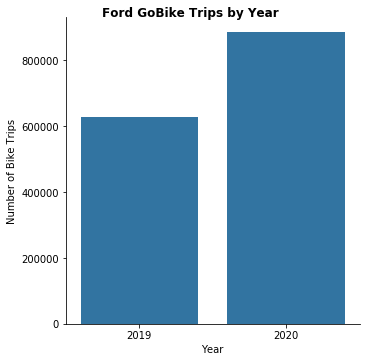

In [150]:
# Ford GoBike Trips by Year 2019 and 2020
graph = sb.catplot(data = df_bike_clean, x = 'start_time_year', kind = 'count', color = no_color, aspect = 1);

graph.set_axis_labels('Year', 'Number of Bike Trips'),

graph.fig.suptitle('Ford GoBike Trips by Year', y = 1.0, fontsize = 12, fontweight = 'bold');

graph.set_xticklabels();

The above figure shows that the bike trips in the months of the year 2019 is relatively very less approx. 620000 and year 2020 has almost 880000 trips. Increase of almost 260000 trips has been seen in 2020.

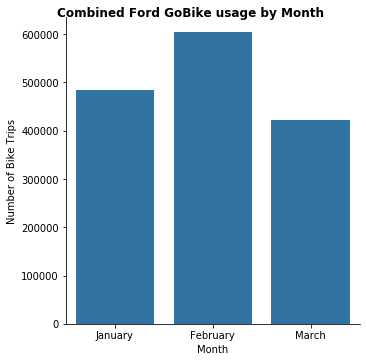

In [159]:
#Combined Monthly usage of year 2019 and 2020 of the Ford Go Bike
graph = sb.catplot(data = df_bike_clean, x = 'start_time_month', kind = 'count', color = no_color, aspect = 1);

graph.set_axis_labels('Month', 'Number of Bike Trips'),

graph.fig.suptitle('Combined Ford GoBike usage by Month', y = 1.0, fontsize = 12, fontweight = 'bold');

graph.set_xticklabels();

The above figure shows that February month has relatively more number of bike trips, followed by January and then March. Let's look into the dataset of each year 2019 and 2020 to see if the same pattern is seen in usage over Months.

In [160]:
#loading cleaned dataset for the year 2019
df_bike_clean_2019 = df_bike_clean.query('start_time_year == "2019"')
df_bike_clean_2019.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,start_time_year,start_time_month_no,start_time_month,start_time_weekday,duration_min,start_time_hour,end_time_hour
0,80825,2019-01-31 17:57:44.613,2019-02-01 16:24:49.864,229.0,Foothill Blvd at 42nd Ave,37.775745,-122.213037,196.0,Grand Ave at Perkins St,37.808894,-122.256460,4861,Subscriber,2019,1,January,Thu,1347,17,16
1,65900,2019-01-31 20:58:33.886,2019-02-01 15:16:54.173,4.0,Cyril Magnin St at Ellis St,37.785881,-122.408915,134.0,Valencia St at 24th St,37.752428,-122.420628,5506,Subscriber,2019,1,January,Thu,1098,20,15
2,62633,2019-01-31 18:06:52.924,2019-02-01 11:30:46.530,245.0,Downtown Berkeley BART,37.870139,-122.268422,157.0,65th St at Hollis St,37.846784,-122.291376,2717,Customer,2019,1,January,Thu,1043,18,11
3,44680,2019-01-31 19:46:09.719,2019-02-01 08:10:50.318,85.0,Church St at Duboce Ave,37.770083,-122.429156,53.0,Grove St at Divisadero,37.775946,-122.437777,4557,Customer,2019,1,January,Thu,744,19,8
4,60709,2019-01-31 14:19:01.541,2019-02-01 07:10:51.065,16.0,Steuart St at Market St,37.794130,-122.394430,28.0,The Embarcadero at Bryant St,37.787168,-122.388098,2100,Customer,2019,1,January,Thu,1011,14,7


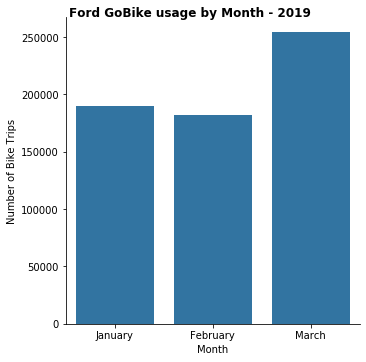

In [164]:
# Monthly usage of the Ford Go Bike system in the year 2019
graph = sb.catplot(data = df_bike_clean_2019, x = 'start_time_month', kind = 'count', color = no_color, aspect = 1);

graph.set_axis_labels('Month', 'Number of Bike Trips'),

graph.fig.suptitle('Ford GoBike usage by Month - 2019', y = 1.0, fontsize = 12, fontweight = 'bold');

graph.set_xticklabels();

The above figure shows that March has the most number of trips in the year 2019. So we can assume that the usage increases in the hotter months.

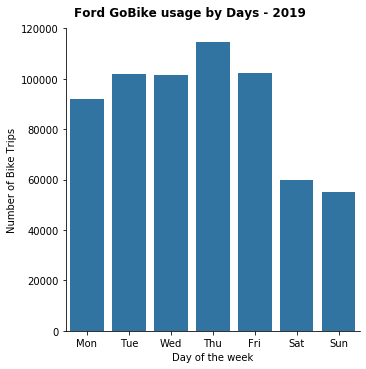

In [165]:
# Days usage of the Ford Go Bike system in the year 2019
weekday = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
graph = sb.catplot(data = df_bike_clean_2019, x = 'start_time_weekday', kind = 'count', color = no_color, order = weekday);

graph.set_axis_labels('Day of the week', 'Number of Bike Trips'),

graph.fig.suptitle('Ford GoBike usage by Days - 2019', y = 1.02, fontsize = 12, fontweight = 'bold');

graph.set_xticklabels();

From the above graph, it is observed that maximum usage over weekdays Mon-Fri and it drops over weekend Sat-Sun. So we can assume that major usage is done for commuting to work on weekdays and casual usage is done over weekend.

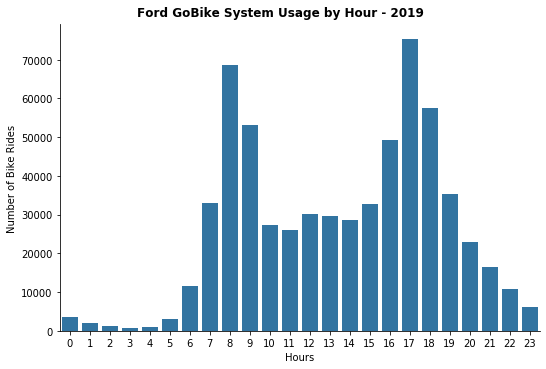

In [166]:
# Hourly usage of the Ford Go Bike System in the year 2019
graph = sb.catplot(data = df_bike_clean_2019, x='start_time_hour', kind='count', color = no_color, aspect = 1.5)

graph.set_axis_labels('Hours', 'Number of Bike Rides')

graph.fig.suptitle('Ford GoBike System Usage by Hour - 2019', y=1.02, fontsize=12, fontweight='bold');

From the above graph, it is observed that maximum usage is at 8am-9am and 5pm-6pm. This hours are genrally the office hours, which suggests that it may be used by the users to commuter to workplace.

In [167]:
df_bike_clean_2019.duration_min.describe(percentiles = [.95])
df_bike_clean_2019.duration_min.describe()

count    626597.000000
mean         12.289428
std          31.239730
min           1.000000
25%           5.000000
50%           8.000000
75%          13.000000
max        1427.000000
Name: duration_min, dtype: float64

In [168]:
df_bike_clean_2019.duration_min.mean()

12.289428452418381

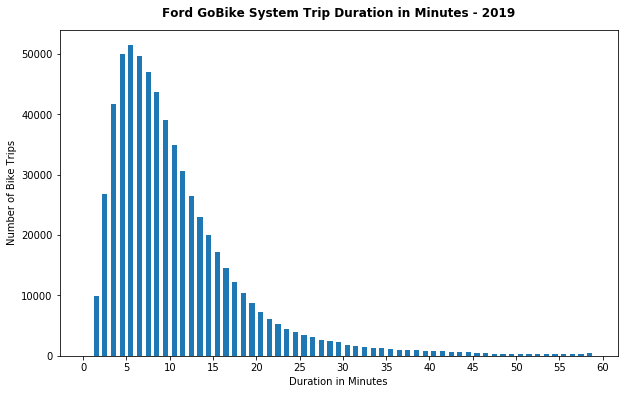

In [174]:
# Duration of the bike rides - in MINUTES
bin_edges = np.arange(0, 60, 1)
ticks = [0, 5, 10, 15, 20, 25, 30,  35, 40, 45,50,55,60]
labels = ['{}'.format(val) for val in ticks]

plt.figure(figsize=[10, 6]);
plt.hist(data = df_bike_clean_2019, x = 'duration_min', bins = bin_edges, rwidth = 0.6);

plt.title("Ford GoBike System Trip Duration in Minutes - 2019", y=1.02, fontsize=12, fontweight='bold')
plt.xlabel('Duration in Minutes')
plt.xticks(ticks, labels)
plt.ylabel('Number of Bike Trips');

The average trip duration is approx. 12 minutes. 75% of the trips has duration less than 13 minutes. The histogram shows that most trips were taken in the duration of 4- 11 minutes  which shows that the rides were taken for smaller distances.

In [58]:
#loading cleaned dataset for the year 2020
df_bike_clean_2020 = df_bike_clean.query('start_time_year == "2020"')
df_bike_clean_2020.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,start_time_year,start_time_month_no,start_time_month,start_time_weekday,duration_min,start_time_hour,end_time_hour
0,83118,2020-01-31 15:23:47.733,2020-02-01 14:29:06.263,400.0,Buchanan St at North Point St,37.804272,-122.433537,400.0,Buchanan St at North Point St,37.804272,-122.433537,13052,Customer,2020,1,January,Fri,1385,15,14
1,68239,2020-01-31 15:40:31.616,2020-02-01 10:37:51.000,99.0,Folsom St at 15th St,37.767037,-122.415443,99.0,Folsom St at 15th St,37.767037,-122.415443,12235,Subscriber,2020,1,January,Fri,1137,15,10
2,55407,2020-01-31 17:48:16.635,2020-02-01 09:11:44.317,197.0,El Embarcadero at Grand Ave,37.808848,-122.249680,197.0,El Embarcadero at Grand Ave,37.808848,-122.249680,12822,Customer,2020,1,January,Fri,923,17,9
3,54929,2020-01-31 17:53:03.413,2020-02-01 09:08:32.634,197.0,El Embarcadero at Grand Ave,37.808848,-122.249680,197.0,El Embarcadero at Grand Ave,37.808848,-122.249680,11705,Customer,2020,1,January,Fri,915,17,9
4,55700,2020-01-31 17:12:33.460,2020-02-01 08:40:53.646,12.0,Pier 1/2 at The Embarcadero,37.796389,-122.394586,371.0,Lombard St at Columbus Ave,37.802746,-122.413579,3673,Customer,2020,1,January,Fri,928,17,8


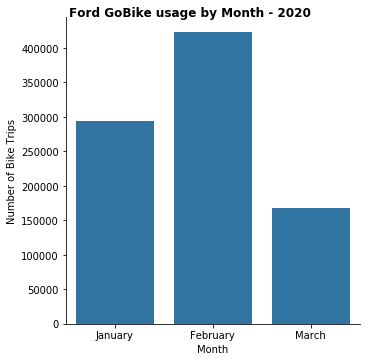

In [175]:
# Monthly usage of the Ford Go Bike system in the year 2020
graph = sb.catplot(data = df_bike_clean_2020, x = 'start_time_month', kind = 'count', color = no_color, aspect = 1);

graph.set_axis_labels('Month', 'Number of Bike Trips'),

graph.fig.suptitle('Ford GoBike usage by Month - 2020', y = 1.0, fontsize = 12, fontweight = 'bold');

graph.set_xticklabels();

Unlike year 2019, February Month has the most number of trips while the March had the least. 

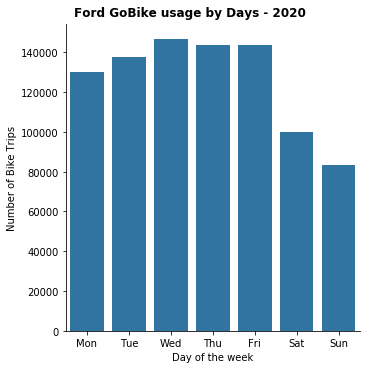

In [176]:
# Days usage of the Ford Go Bike system in the year 2020
weekday = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
graph = sb.catplot(data = df_bike_clean_2020, x = 'start_time_weekday', kind = 'count', color = no_color, order = weekday);

graph.set_axis_labels('Day of the week', 'Number of Bike Trips'),

graph.fig.suptitle('Ford GoBike usage by Days - 2020', y = 1.02, fontsize = 12, fontweight = 'bold');

graph.set_xticklabels();

From the above graph, it is observed that maximum usage over weekdays Mon-Fri and it drops over weekend Sat-Sun. So we can assume that major usage is done for commuting to work on weekdays and casual usage is done over weekend.

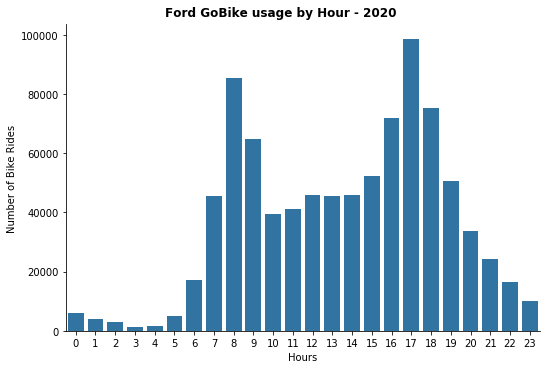

In [177]:
# Hourly usage of the Ford Go Bike System
graph = sb.catplot(data = df_bike_clean_2020, x='start_time_hour', kind='count', color = no_color, aspect = 1.5)

graph.set_axis_labels('Hours', 'Number of Bike Rides')

graph.fig.suptitle('Ford GoBike usage by Hour - 2020', y=1.02, fontsize=12, fontweight='bold');

From the above graph, the similar pattern as 2019 is observed that is maximum usage at 8am-9am and 5pm-6pm. This hours are genrally the office hours, which suggests that it may be used by the users to commute to workplace.

In [178]:
df_bike_clean_2020.duration_min.describe(percentiles = [.95])
df_bike_clean_2020.duration_min.describe()

count    884811.000000
mean         12.931363
std          27.705039
min           1.000000
25%           6.000000
50%           9.000000
75%          15.000000
max       13517.000000
Name: duration_min, dtype: float64

In [179]:
df_bike_clean_2020.duration_min.mean()

12.931362743003874

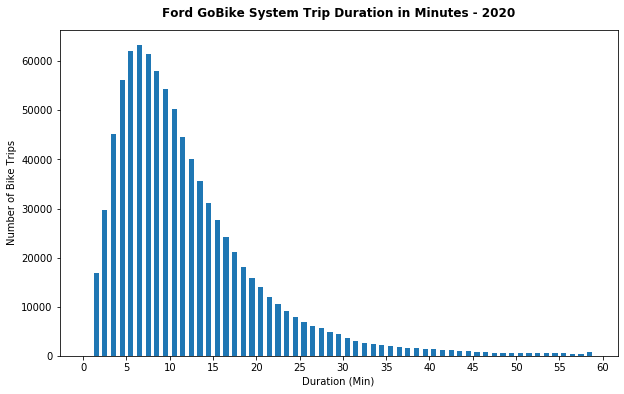

In [180]:
# Duration of the bike rides - in MINUTES
bin_edges = np.arange(0, 60, 1)
ticks = [0, 5, 10, 15, 20, 25, 30,  35, 40, 45,50,55,60]
labels = ['{}'.format(val) for val in ticks]

plt.figure(figsize=[10, 6]);
plt.hist(data = df_bike_clean_2020, x = 'duration_min', bins = bin_edges, rwidth = 0.6);

plt.title("Ford GoBike System Trip Duration in Minutes - 2020", y=1.02, fontsize=12, fontweight='bold')
plt.xlabel('Duration (Min)')
plt.xticks(ticks, labels)
plt.ylabel('Number of Bike Trips');

The average trip duration is approx. 12.9 minutes. 75% of the trips has duration less than 15 minutes. The histogram shows that most trips were taken in the duration of 4- 12 minutes  which shows that the rides were taken for smaller distances.

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

No, there were no such unsual points that has been observed.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

No, there were no such unusal distributions obseved. Although, while plotting for the Trip Duration in Minutes ticks were used to get better and understandle graph.

### Bivariate Exploration

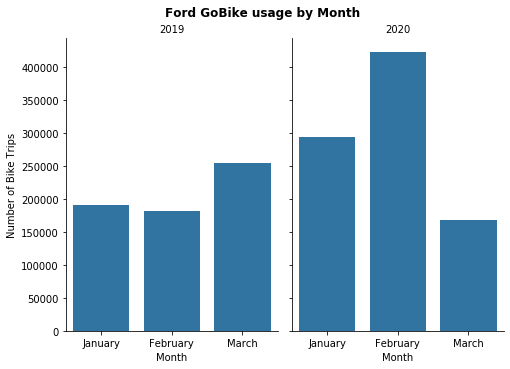

In [181]:
# 2019 usage by month vs. 2020 usage by month
graph = sb.catplot(data=df_bike_clean, x='start_time_month', col="start_time_year", kind='count', sharey = True, color = no_color, aspect = 0.7);

graph.set_axis_labels("Month", "Number of Bike Trips");
graph.set_titles("{col_name}");

graph.fig.suptitle('Ford GoBike usage by Month', y=1.02, fontsize=12, fontweight='bold');

From the above figure, it is observed that there is major spike in the usage of the system in the month of Feb-2020 in copmarison with Feb-2019. The increase is more then double in comparison to Feb-2019. While the reversed is observed in the month of March. March-2020 had comparatively less no. of bike trips than March-2019.

In [68]:
df_bike_clean_2019.start_time_month.value_counts()

March       254567
January     190350
February    181680
Name: start_time_month, dtype: int64

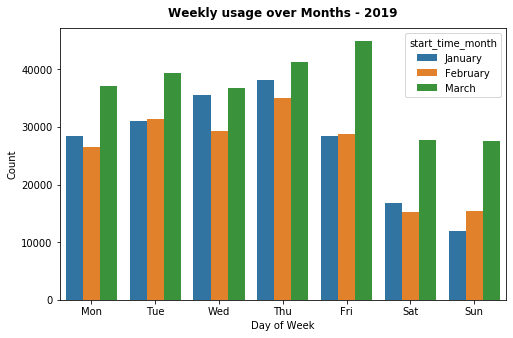

In [184]:
# weekly usage over the months January, February and March
plt.figure(figsize=(8, 5))
weekday = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']

sb.countplot(data=df_bike_clean_2019, x='start_time_weekday', hue='start_time_month', order= weekday);
plt.xlabel('Day of Week');
plt.ylabel('Count');
plt.title('Weekly usage over Months - 2019',y=1.02, fontsize=12, fontweight='bold');

From the above graph, it is observed that the usage decreases over the weekend i.e Saturday and Sunday. While the usage seems to be consistent on weekdays. From this we can assume that major rides have been taken by the people for commuting to workplace.

In [70]:
df_bike_clean_2020.start_time_month.value_counts()

February    423081
January     294122
March       167608
Name: start_time_month, dtype: int64

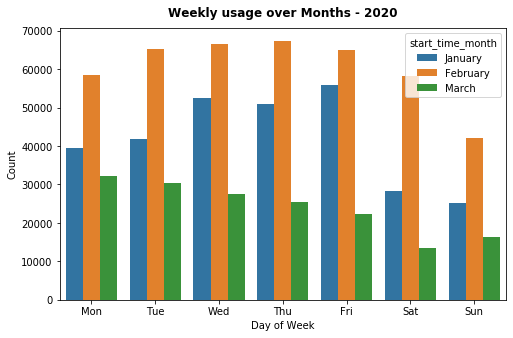

In [185]:
# weekly usage over the months January, February and March
plt.figure(figsize=(8, 5))
weekday = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']

sb.countplot(data=df_bike_clean_2020, x='start_time_weekday', hue='start_time_month', order= weekday);
plt.xlabel('Day of Week');
plt.ylabel('Count');
plt.title('Weekly usage over Months - 2020',y=1.02, fontsize=12, fontweight='bold');

From the above figure, it is observed that:
- January and February - Decrease in the usage over weekend
- March - The usage seems pretty consistent from Mon-Sat. Decrease in the usage is observed on Sunday.

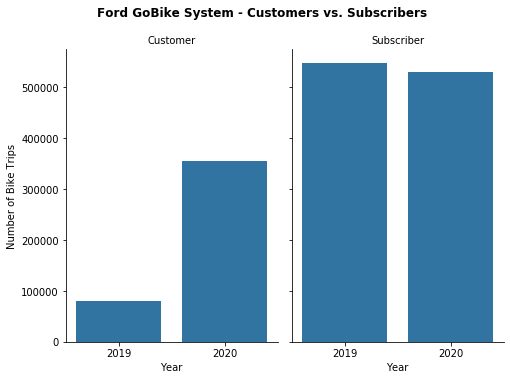

In [186]:
# Customer vs. Subscriber usage in the year 2019 and 2020
graph = sb.catplot(data=df_bike_clean, x='start_time_year', col="user_type", kind='count', sharey = True, color = no_color, aspect= 0.7);

graph.set_axis_labels("Year", "Number of Bike Trips");
graph.set_titles("{col_name}");

graph.fig.suptitle('Ford GoBike System - Customers vs. Subscribers', y=1.05, fontsize=12, fontweight='bold');
graph.set_xticklabels();

The number of Customer taking trips in each year is much less than the number of Subscribers taking trips. 
While there is a major spike seen in the no. of customer trips in year 2020 to the year 2019, and this could be the reason that Saturdays seems to have more trips in the year 2020 while less trips in year 2019.

Now let's look into the percentage of each user type i.e. Customer and Subscribers in each year

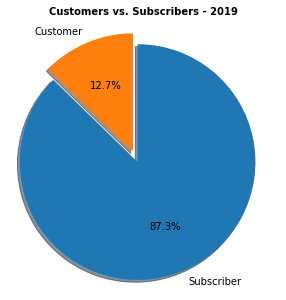

In [192]:
# Customers vs Subscribers percentage in the year 2019
plt.figure(figsize=[8, 5]);

sorted_value = df_bike_clean_2019.user_type.value_counts()/df_bike_clean_2019.shape[0];
plt.title('Customers vs. Subscribers - 2019', fontsize=10, fontweight='bold')
plt.pie(sorted_value, explode=[0, 0.1], labels=sorted_value.index, startangle=90, counterclock=False, autopct='%1.1f%%', shadow=True);
plt.axis('square');

The percentage of the customers i.e. 12.7% is very less as compared to the percentage of the Subscribers i.e. 87.3%.

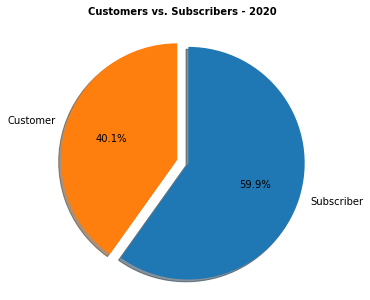

In [193]:
# Customers vs Subscribers percentage in the year 2020
plt.figure(figsize=[8, 5]);

sorted_value = df_bike_clean_2020.user_type.value_counts()/df_bike_clean_2020.shape[0];
plt.title('Customers vs. Subscribers - 2020', fontsize=10, fontweight='bold')
plt.pie(sorted_value, explode=[0, 0.1], labels=sorted_value.index, startangle=90, counterclock=False, autopct='%1.1f%%', shadow=True);
plt.axis('square');

There is no major differece seen in the percentage of Customers (40.1%) to the Subscribers (59.9%). Year 2020 could attract more customers, which says there was marketing strategy used to attract other usrt type i.e Customers.

### Exploration 2019 graphs

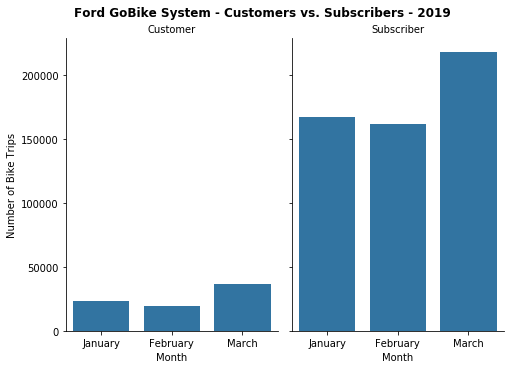

In [194]:
# Customer Usage by Month vs. Subscriber Usage by Month
graph = sb.catplot(data=df_bike_clean_2019, x='start_time_month', col="user_type", kind='count', sharey = True, color = no_color, aspect = 0.7);

graph.set_axis_labels("Month", "Number of Bike Trips");
graph.set_titles("{col_name}");

graph.fig.suptitle('Ford GoBike System - Customers vs. Subscribers - 2019', y=1.02, fontsize=12, fontweight='bold');
graph.set_xticklabels();

From the above figure, it is observed that over all 3 months, Subcribers are major users for the FordGo Bike System.

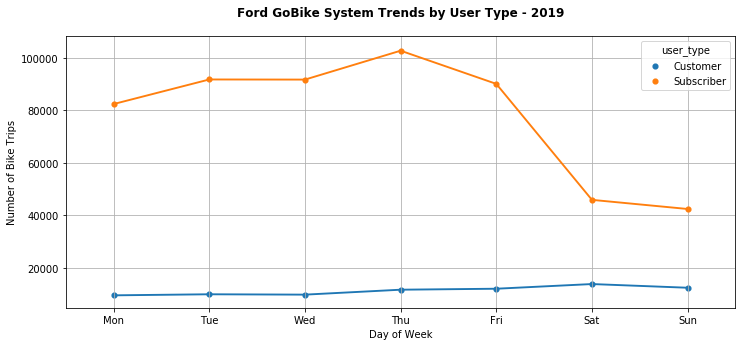

In [221]:
# Customer Usage by Weekday vs. Subscriber Usage by Weekday
plt.figure(figsize=(12, 5))

df_cleaned_user_week = df_bike_clean_2019.groupby(['start_time_weekday', 'user_type']).size().reset_index()
weekday = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']

ax = sb.pointplot(data=df_cleaned_user_week, x='start_time_weekday', y=0, hue = 'user_type', scale=.7, order = weekday);

plt.title('Ford GoBike System Trends by User Type - 2019', y=1.05, fontsize=12, fontweight='bold')
plt.xlabel('Day of Week')
plt.ylabel('Number of Bike Trips');
plt.grid()

From the above graph, it is observed that there is a consistent usage over all days by the Customers with a little increase over the weekends. While for Subscibers, the maximum usage is over weekday i.e. Mon-Fri and the usage decreases over the weekend i.e Sat-Sun. From this, it can be said that Subscribers uses the system majorly to commute for work(as they need to travel everyday so could have subscribed to the monthly/yearly pass.) While customers were using for casual visits over the weekend.

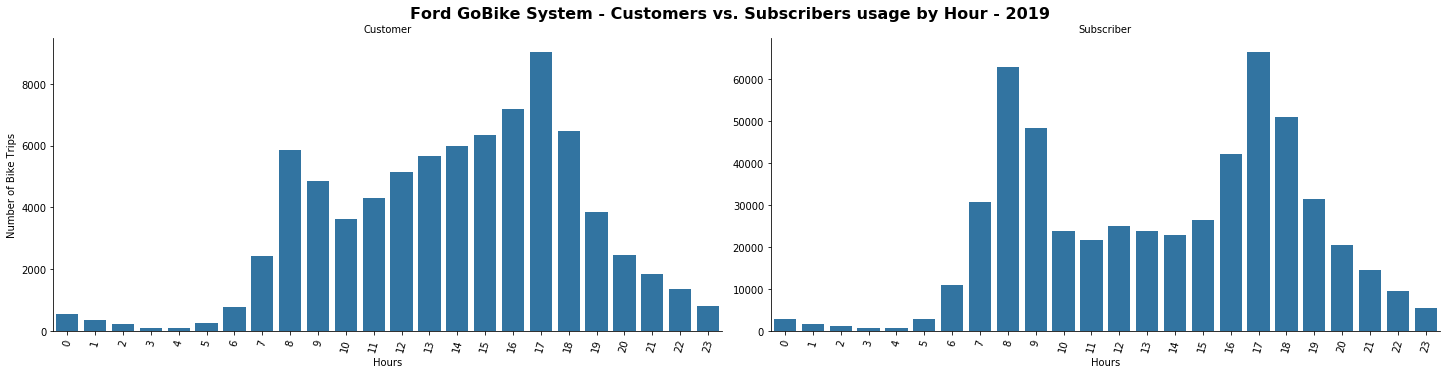

In [216]:
#Customers vs. Subscribers usage by Hour - 2019
graph = sb.catplot(data=df_bike_clean_2019, x = 'start_time_hour', col='user_type', kind='count', sharey = False, color = no_color, height=5, aspect=2);

graph.set_axis_labels('Hours', 'Number of Bike Trips')
graph.set_titles('{col_name}')

graph.fig.suptitle('Ford GoBike System - Customers vs. Subscribers usage by Hour - 2019', y=1.02, fontsize=16, fontweight='bold');
graph.set_xticklabels(rotation=75);

Note: There is a differnce in the y-axis shared and hence visualization becomes difficult.
But after observing the graphs, it is seen that both Customers and Subscribers maximum usage is at 8am-9am and 5pm-6pm. This hours are genrally the office hours, which suggests that it may be used by the users to commute to workplace. While Customers can be using the early morning time and evening time for casual outings/visits.

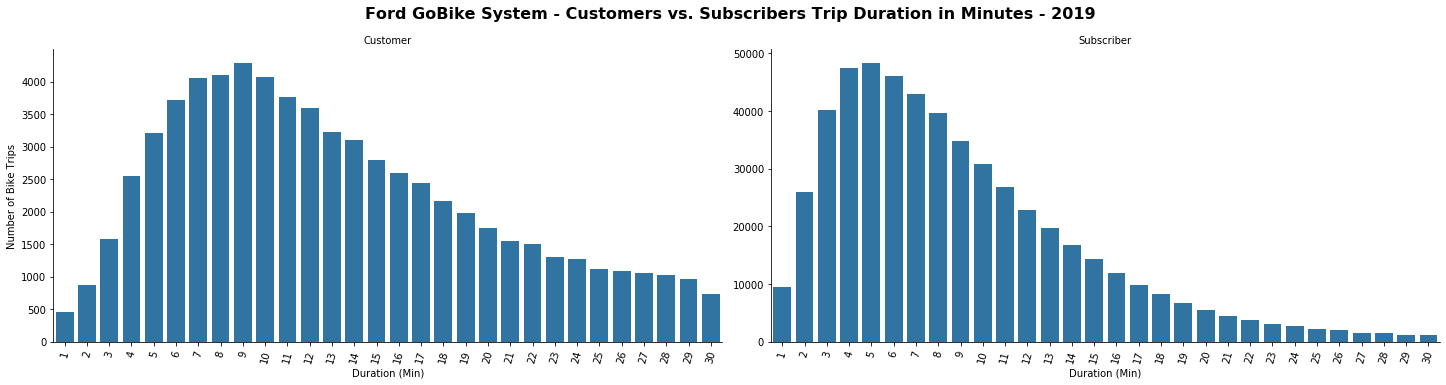

In [212]:
# Customer Usage by Duration vs. Subscriber Usage by Duration

data = df_bike_clean_2019.query('duration_min <= 30')

graph = sb.catplot(data=data, x = 'duration_min', col='user_type', kind='count', sharey = False, color = no_color, height=5, aspect=2);

graph.set_axis_labels('Duration (Min)', 'Number of Bike Trips')
graph.set_titles('{col_name}')

graph.fig.suptitle('Ford GoBike System - Customers vs. Subscribers Trip Duration in Minutes - 2019', y=1.05, fontsize=16, fontweight='bold');
graph.set_xticklabels(rotation=75);

Note: There is a differnce in the y-axis shared and hence visualization becomes difficult.
But after observing the graphs, it is seen that Subscribers tend to take a trip for a smaller duration which says they are travelling to the areas in closer proximity. 

### Exploration 2020 graphs

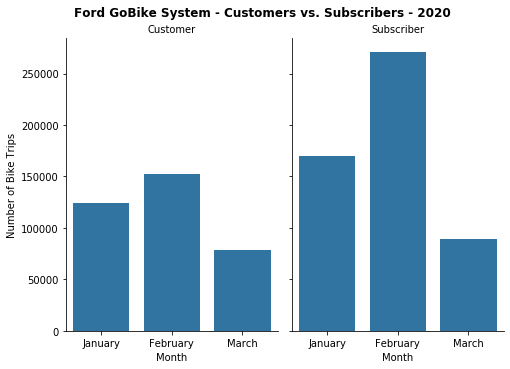

In [199]:
# Customer Usage by Month vs. Subscriber Usage by Month
graph = sb.catplot(data=df_bike_clean_2020, x='start_time_month', col="user_type", kind='count', sharey = True, color = no_color, aspect = 0.7);

graph.set_axis_labels("Month", "Number of Bike Trips");
graph.set_titles("{col_name}");

graph.fig.suptitle('Ford GoBike System - Customers vs. Subscribers - 2020', y=1.02, fontsize=12, fontweight='bold');
graph.set_xticklabels();

From the above figure, it is observed that over all 3 months, Subcribers are major users for the FordGo Bike System but over Month March, there is no subsequent increase in the usage of the subscribers than customers.

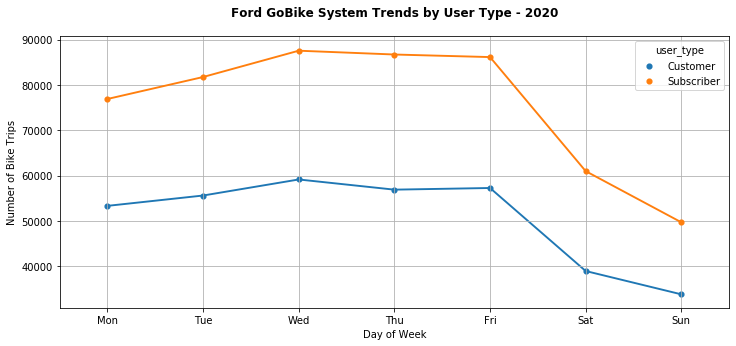

In [222]:
# Customer Usage by Weekday vs. Subscriber Usage by Weekday
plt.figure(figsize=(12, 5))

df_cleaned_user_week = df_bike_clean_2020.groupby(['start_time_weekday', 'user_type']).size().reset_index()
weekday = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']

ax = sb.pointplot(data=df_cleaned_user_week, x='start_time_weekday', y=0, hue = 'user_type', scale=.7, order = weekday);

plt.title('Ford GoBike System Trends by User Type - 2020', y=1.05, fontsize=12, fontweight='bold')
plt.xlabel('Day of Week')
plt.ylabel('Number of Bike Trips');
plt.grid()

From the above graph, the similar usage pattern is seen for both Customer and Subscriber i.e maximum usage over weekdays Mon-Fri and the decrease is seen over weekend Sat-Sun. Subcribers might be using for commuting to work (as they need to travel everyday so could have subcribed to the monthly/yearly pass.) While the same pattern is observed for Customers, we can assume that customers are frequently using FordGo for gtocery shopping/casual meeting/work etc.

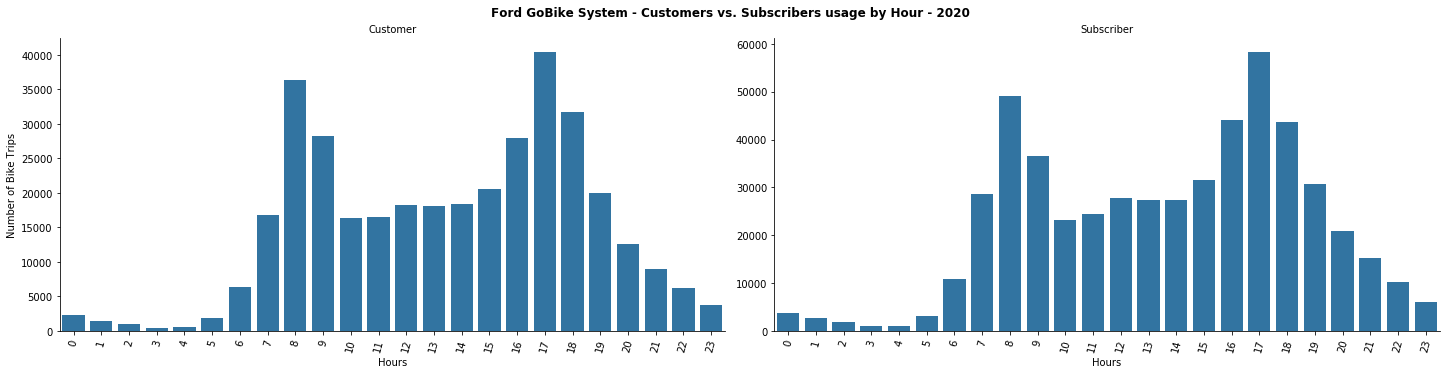

In [215]:
#Customers vs. Subscribers usage by Hour - 2020
graph = sb.catplot(data=df_bike_clean_2020, x = 'start_time_hour', col='user_type', kind='count', sharey = False, color = no_color, height=5, aspect=2);

graph.set_axis_labels('Hours', 'Number of Bike Trips')
graph.set_titles('{col_name}')

graph.fig.suptitle('Ford GoBike System - Customers vs. Subscribers usage by Hour - 2020', y=1.02, fontsize=16, fontweight='bold');
graph.set_xticklabels(rotation=75);

Note: There is a differnce in the y-axis shared and hence visualization becomes difficult. But after observing the graphs, it is seen that both Customers and Subscribers maximum usage is at 8am-9am and 5pm-6pm. This hours are genrally the office hours, which suggests that it may be used by the users to commute to workplace. While Customers can be using the early morning time and evening time for casual outings/visits.

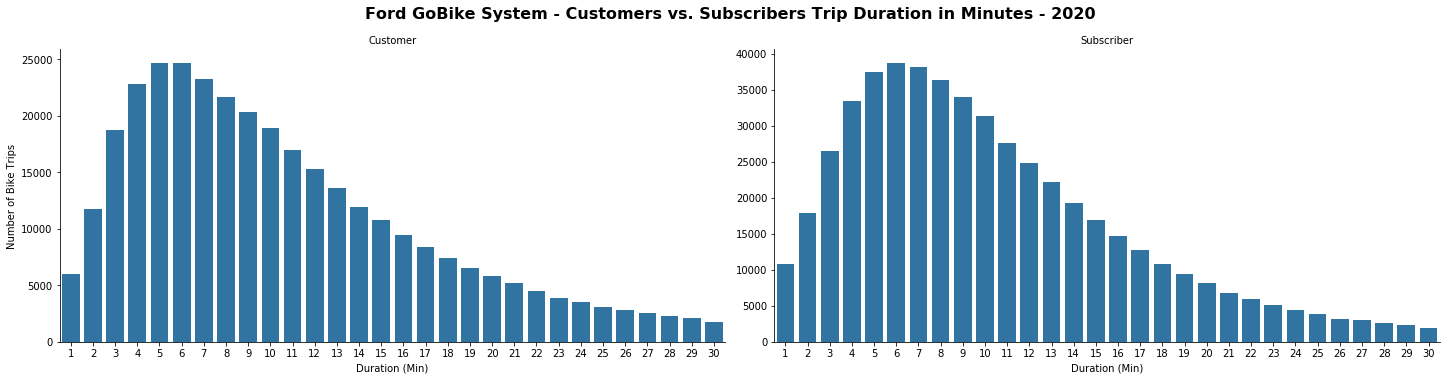

In [202]:
# Customer Usage by Duration vs. Subscriber Usage by Duration

data = df_bike_clean_2020.query('duration_min <= 30')

graph = sb.catplot(data=data, x = 'duration_min', col='user_type', kind='count', sharey = False, color = no_color, height=5, aspect=2);
graph.set_axis_labels('Duration (Min)', 'Number of Bike Trips')
graph.set_titles('{col_name}')

graph.fig.suptitle('Ford GoBike System - Customers vs. Subscribers Trip Duration in Minutes - 2020', y=1.05, fontsize=16, fontweight='bold');
graph.set_xticklabels();

Note: There is a differnce in the y-axis shared and hence visualization becomes difficult. But after observing the graphs, it is seen that both Subscribers and Customers tend to take a trip for a smaller duration which says they are travelling to the areas in closer proximity.

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

Over winter months, there seemed to drastic increase in the percentage of the Customer over year 2020 than in 2019. In 2019 Customer percentage were 12.7% while in 2020 it is 40.1%, so an increase of 27.4%. In 2019, the usage pattern of the customer is differnt than that og 2020. In 2019, the usage by the customers increases on weekends Sat-Sun, while in 2020, the pattern is reverse. More usage on weekdays Mon-Fri and it decreases over the weekend Sat-Sun.While subscribers in both the years have similar pattern.

Plus, I have added comments after observing each graph.

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

Both Customers and Subcribers in both the years have the maximum usage at the same hour of the day. Plus both the user type tend to have trips for a smaller duration(which means they are travelling to areas in closer proximities.) Shorter trips are seen, beacuse of the fact that Jan, Feb and March are the winter months and people avoid causual trips (like trips over weekend in Summer.)

## Multivariate Exploration

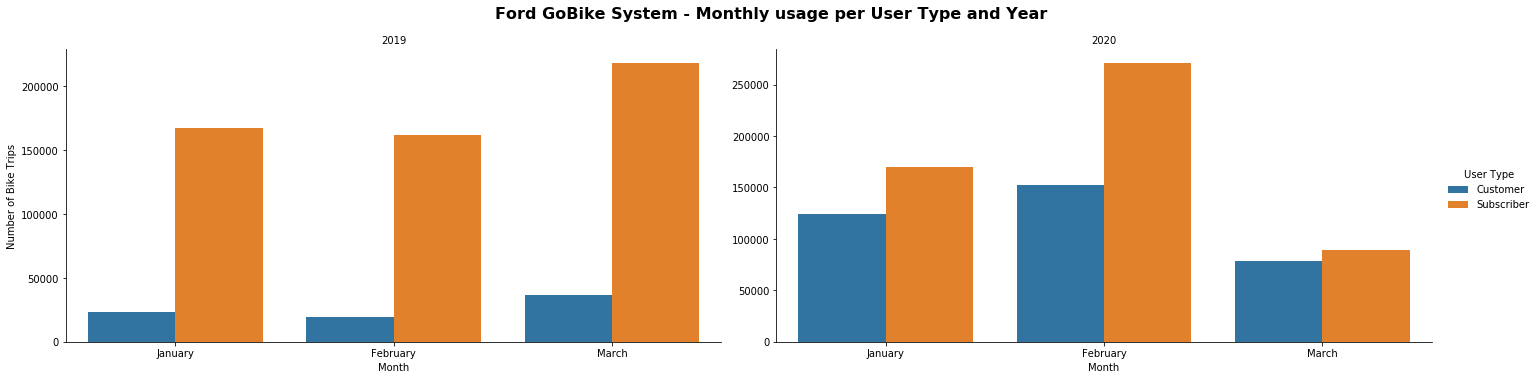

In [204]:
# Monthly usage - year and user type
graph = sb.catplot(data=df_bike_clean, x='start_time_month', col="start_time_year", hue="user_type", kind='count', sharey = False, height=5, aspect=2);

graph.set_axis_labels("Month", "Number of Bike Trips")
graph._legend.set_title('User Type')
graph.set_titles("{col_name}")

graph.fig.suptitle('Ford GoBike System - Monthly usage per User Type and Year', y=1.05, fontsize=16, fontweight='bold');
graph.set_xticklabels();

The above figure shows the comparison of usage of the user type over the months in year 2019 vs. 2020. 

In 2019, it is clearly visible the usage of Subscribers is much more than Customers.
In 2020, usage of the Customers increased compared to that of the year 2019, so we can say the popularity of the FordGo Bike system increased over other user type group i.e Customer. ( Proving, that the marketing strategy used by FordGo Bike System was successful to attract more customers.) 

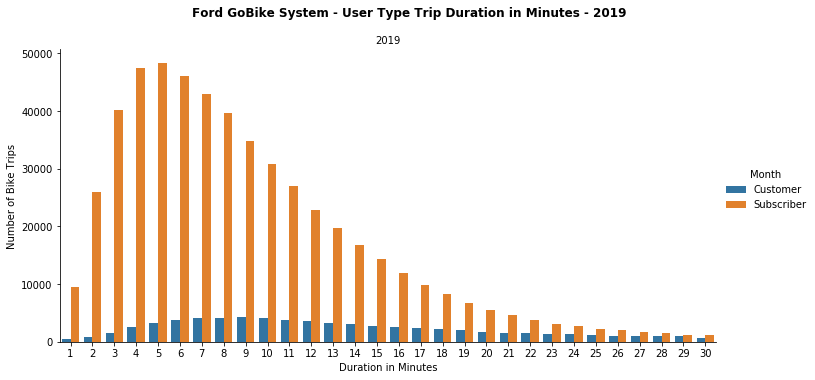

In [223]:
# User type usage by Duration in Minutes
data = df_bike_clean_2019.query('duration_min <= 30')
graph = sb.catplot(data=data, x='duration_min', col="start_time_year", hue="user_type", kind='count', sharey = False, height=5, aspect=2);

graph.set_axis_labels("Duration in Minutes", "Number of Bike Trips")
graph._legend.set_title('Month')
graph.set_titles("{col_name}")

graph.fig.suptitle('Ford GoBike System - User Type Trip Duration in Minutes - 2019', y=1.05, fontsize=12, fontweight='bold');
graph.set_xticklabels();

It is clearly seen the difference in the usage of the user type in 2019. Major users were Subscibers and thet tend to take trio for a smaller duration, which says they were travelling to areas in the closer proximity. As stated in the earlier graphs, that Subcribers might be using the system for commuting to work and shows that the users do not stay very far from their workplace.

While the usage of customers is really less, from which we can assume Customers were not keen on using FordGo Bike System. This could be the case because these are winter months and people do not tend to move around for the casual reason. From the earlier graphs, it is seen the usage of the Customers over weekend, proving they are using the bike for the casual reason.

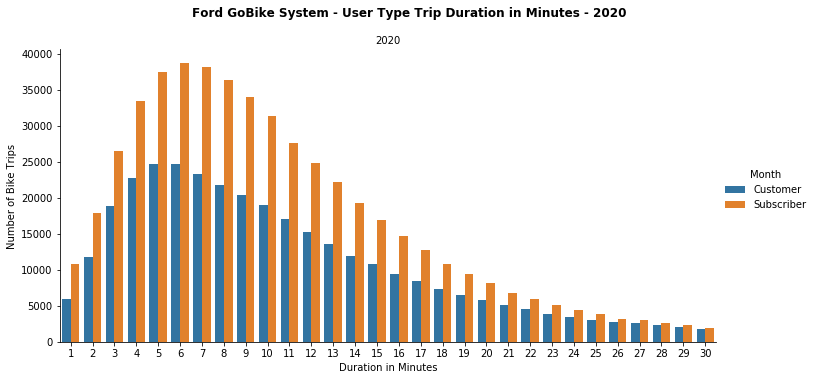

In [224]:
# Mont# User type usage by Duration in Minutes
data = df_bike_clean_2020.query('duration_min <= 30')
graph = sb.catplot(data=data, x='duration_min', col="start_time_year", hue="user_type", kind='count', sharey = False, height=5, aspect=2);

graph.set_axis_labels("Duration in Minutes", "Number of Bike Trips")
graph._legend.set_title('Month')
graph.set_titles("{col_name}")

graph.fig.suptitle('Ford GoBike System - User Type Trip Duration in Minutes - 2020', y=1.05, fontsize=12, fontweight='bold');
graph.set_xticklabels();

In 2020, the usage of the Customers have increased drastically from year 2019. This is the reason because they were drastic increase in the % users of Customers. Although the similar pattern is seen in the usage amongst both user types. Maximum trips were of short time assuming that they were travelling to place in a closer proximity.
Subcribers-could be using the system for commuting to work
Customers-could be using the system to go for grocery shopping/casual meeting/work etc.

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?
Multivariate has strengthened the Univariate and Bivariatebexplorations and proved to be true of the better implementation of the markting strategy by FordGo to attract the customers of different user type. The % of the customers increased by almost 27% in 2020 over winter months, while the behaviour pattern of usage is also seen.

### Were there any interesting or surprising interactions between features?
Drastic increase in the % of the customers and in the month of March,2020 no such difference in the no of trips taken by Subscribers over Customers, which shows the similar usage pattern over the months.